# Using Python to get financial data
### MSDS 430 - Python for data Science - Final Project
###### Carrie Lu & Ryan Zimmerman


For the final project we're going to work with financial data.  We're planning to use the Pandas data reader and iex API as no importing of CSV datasets is necessary and this can give more real time data if needed. 

In [3]:
#get the appropriate libraries and import the data
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#create object variables start and end
start = date.today()-timedelta(720)
end = date.today()


#set up for stock ticker
ticker = 'GOOG'

#get data from iex
data_source = 'iex'


#create data reader object
stock_data = DataReader(ticker,data_source,start,end)



In [4]:
#table of stock data for google
stock_data.head()

,open,high,low,close,volume
date,,,,,
2016-12-05,757.71,763.90,752.900,762.52,1394223
2016-12-06,764.73,768.83,757.340,759.11,1690689
2016-12-07,761.00,771.36,755.800,771.19,1760966
2016-12-08,772.48,778.18,767.230,776.42,1488059
2016-12-09,780.00,789.43,779.021,789.29,1821914


Our professor also wanted us to read in .CSV data so he could see us demonstrate this.  The goal here is to show that we can read in CSV information. We did choose however to use Pandas for our project.  The next step will demonstrate while we got the data from Kaggle.com it it was difficult to find up to date CSV information on stocks.  While with enough research we probably could have, the effort to manually maintain CSV data meant that using Pandas data reader was the preferred method for importing financial information.

In [33]:
#used pandas to do this so we could easily create columns
import pandas as pd

#read in the file and created columns
data = pd.read_csv('prices.csv', sep=",")
data.columns = ['date','symbol','open','close','low','high','volume']

#show just google data
data_goog_index = data['symbol'].str.contains('GOOG')
print(data[data_goog_index].head(5))

#show just google data and sort by date
df = pd.DataFrame(data)
df_filtered = df[(df.symbol == 'GOOG')&(df.date>'2015-01-01')].sort_values(by =['date'],ascending=False)
df_filtered.head()




            date symbol        open       close         low        high  \
439   2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
440   2010-01-04  GOOGL  626.950006  626.750011  624.240011  629.510005   
907   2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
908   2010-01-05  GOOGL  627.180001  623.990017  621.540016  627.839984   
1375  2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   

         volume  
439   3927000.0  
440   3908400.0  
907   6031900.0  
908   6003300.0  
1375  7987100.0  


,date,symbol,open,close,low,high,volume
727086,2016-01-07,GOOG,730.309998,726.390015,719.059998,738.500000,2963700.0
726587,2016-01-06,GOOG,730.000000,743.619995,728.919983,747.179993,1947000.0
726088,2016-01-05,GOOG,746.450012,742.580017,738.640015,752.000000,1950700.0
725589,2016-01-04,GOOG,743.000000,741.840027,731.257996,744.059998,3272800.0
725090,2015-12-31,GOOG,769.500000,758.880005,758.340027,769.500000,1489600.0


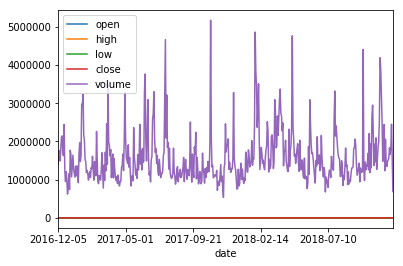

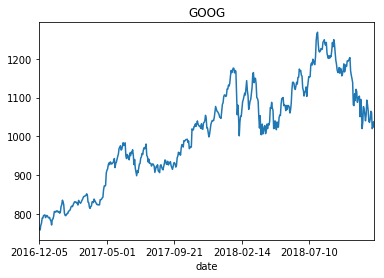

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot all variables
stock_data.plot()
plt.show()

#refining to show google at close over time as volume dominates the first chart
stock_data['close'].plot(title=ticker)

Typically averages are used often to determine a markets major trend, we're going to import the dow jones industrial average and then calculate the average to show how it's changed in the last two years

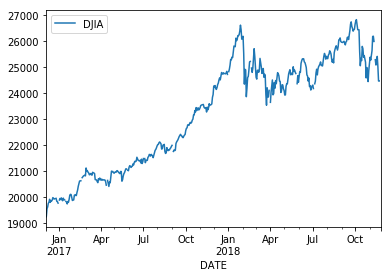

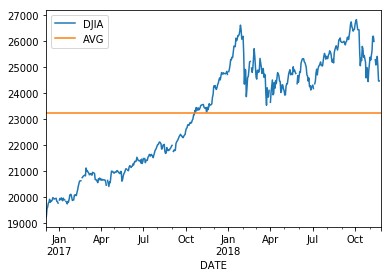

In [6]:
import numpy as np
import pandas as pd

#read in dow jones data from Fred
data = DataReader('DJIA', 'fred', start, end)

#dow jones over time
data.plot()
plt.show()

#adding in an average line
data.insert(1,'AVG',(np.sum(data.DJIA)/data.DJIA.count()))


#dow jones over time
data.plot()
plt.show()


Let's create a function that allows a user to input data and return a plot for a certain stock over a certain time period

Please enter a stock symbol: GOOG
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-11-10


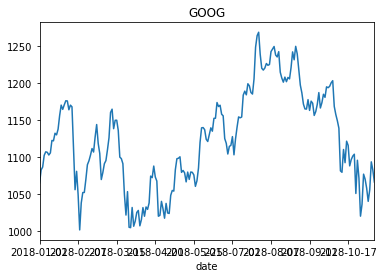

In [7]:
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#creating a function to pull data for a user input stock
while True:
    try:
         ticker = str(input("Please enter a stock symbol: "))
         start = str(input("Please enter a start date in YYYY-MM-DD format: "))
         end = str(input("Please enter an end date in YYYY-MM-DD format: "))
         data_source = 'iex'
         stock_data = DataReader(ticker,data_source,start,end)
         stock_data['close'].plot(title=ticker)
         break  
        
    except ValueError:
         print("Please enter a valid stock symbol and a date in YYYY-MM-DD format, e.g.: 2018-11-23")


#creating a user defined function to do the same thing
def stock_chart(ticker,data_source = 'iex', start,end):
         stock_data = DataReader(ticker,data_source,start,end)
         return stock_data['close'].plot(title=ticker) 

stock_chart(ticker ='GOOG', start = '2018-01-01', end ='2018-11-01')

            

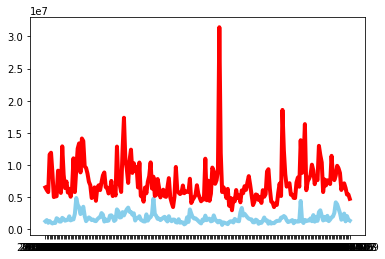

In [40]:
#comparing 2 stocks at a time
stock_data1 = DataReader('GOOG','iex','2018-01-01','2018-11-10')
stock_data2 = DataReader('NKE','iex','2018-01-01','2018-11-10')



plt.plot( 'volume',data=stock_data1, markersize=1, color='skyblue', linewidth=4)
plt.plot( 'volume',data=stock_data2, markersize=1, color='red', linewidth=4)

